In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from scipy import stats as st

# Шаг 1. Загрузка данных

### Входные данные:
Имеются данные из нескольких городов о некотрых пользователях сервиса GoFast.

Необходимо:
1. Предобработать данные.
2. Провести ислледовательский анализ данных.
3. Проверить гипотезы.

In [2]:
# Получаем данные
users = pd.read_csv("https://code.s3.yandex.net/datasets/users_go.csv")
rides = pd.read_csv("https://code.s3.yandex.net/datasets/rides_go.csv")
subscribtions = pd.read_csv("https://code.s3.yandex.net/datasets/subscriptions_go.csv")

In [3]:
def get_data_info(data):
    print(data.head())
    print("_"*100)
    print()
    print(data.info())

In [4]:
# Получаем данные о датасете
get_data_info(users)
print("_"*100)
users['city'].value_counts()

   user_id        name  age            city subscription_type
0        1        Кира   22          Тюмень             ultra
1        2   Станислав   31            Омск             ultra
2        3     Алексей   20          Москва             ultra
3        4  Константин   26  Ростов-на-Дону             ultra
4        5       Адель   28            Омск             ultra
____________________________________________________________________________________________________

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB
None
___________________________________

city
Пятигорск         226
Екатеринбург      206
Ростов-на-Дону    202
Краснодар         196
Сочи              192
Омск              186
Тюмень            185
Москва            172
Name: count, dtype: int64

Данные users имеет следующие атрибуты:
* **user_id**	уникальный идентификатор пользователя
* **name**	имя пользователя
* **age**	возраст
* **city**	город
* **subscription_type**	тип подписки (free, ultra)

Данные содержат информацию о 1534 пользователях (без учета дубликатов) из 8 городов

In [5]:
get_data_info(rides)

   user_id     distance   duration        date
0        1  4409.919140  25.599769  2021-01-01
1        1  2617.592153  15.816871  2021-01-18
2        1   754.159807   6.232113  2021-04-20
3        1  2694.783254  18.511000  2021-08-11
4        1  4028.687306  26.265803  2021-08-28
____________________________________________________________________________________________________

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB
None


In [6]:
print(rides.date.min())
print(rides.date.max())

2021-01-01
2021-12-30


Данные rides имеет следующие атрибуты:
* **user_id** - уникальный идентификатор пользователя
* **distance** - расстояние, которое пользователь проехал в текущей сессии (в метрах)
* **duration** - продолжительность сессии (в минутах) — время с того момента, как пользователь нажал кнопку «Начать поездку» до момента, как он нажал кнопку «Завершить поездку»
* **date** - дата совершения поездки

Данные содержат информацию о 18068 поездках пользователях за период 2021.01.01 - 2021.12.30

In [7]:
get_data_info(subscribtions)

  subscription_type  minute_price  start_ride_price  subscription_fee
0              free             8                50                 0
1             ultra             6                 0               199
____________________________________________________________________________________________________

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 192.0+ bytes
None


Данные rides имеет следующие атрибуты:
* **subscription_type** - тип подписки
* **minute_price** - стоимость одной минуты поездки по данной подписке
* **start_ride_price** - стоимость начала поездки
* **subscription_fee** - стоимость ежемесячного платежа

Сервис GoFast имеет два типа подписки:

free:
* Стоимость старта поездки - 50 руб.
* Стоимость минуты - 8 руб.
* Ежемесчная плата отсутствует.

ultra:
* Стоимость старта поездки - 0 руб
* Стоимость минуты - 6 руб.
* Ежемесечная плата - 199 руб.


# Шаг 2. Предобработка данных

In [8]:
# Параметр date имеет тип object, переводим его в datetime
rides['date'] = pd.to_datetime(rides['date'], format="%Y-%m-%d")
rides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   18068 non-null  int64         
 1   distance  18068 non-null  float64       
 2   duration  18068 non-null  float64       
 3   date      18068 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 564.8 KB


In [9]:
# Создаем столбец с номером месяца
rides['month'] = rides['date'].dt.month
rides.head()

,user_id,distance,duration,date,month
0,1,4409.919140,25.599769,2021-01-01,1
1,1,2617.592153,15.816871,2021-01-18,1
2,1,754.159807,6.232113,2021-04-20,4
3,1,2694.783254,18.511000,2021-08-11,8
4,1,4028.687306,26.265803,2021-08-28,8


**Пропущенных знеачений не было обнаружено на этапе 1.**

Проверим дубликаты

In [10]:
print(f"Количество дубликатов в rides: {rides[rides.duplicated()].count().sum()}")

Количество дубликатов в rides: 0


In [11]:
print(f"Количество дубликатов в users: {users[users.duplicated()]['user_id'].count()}")
users = users.drop_duplicates()

Количество дубликатов в users: 31


#### Вывод:
В ходе преобработки были выявлены и обработаны дубликаты в **users**, а также приведен тип даты. В других данных дубликатов и неверных типов обнаружено не было.

# Шаг 3. Исследовательский анализ данных

### 3.1 частота встречаемости городов

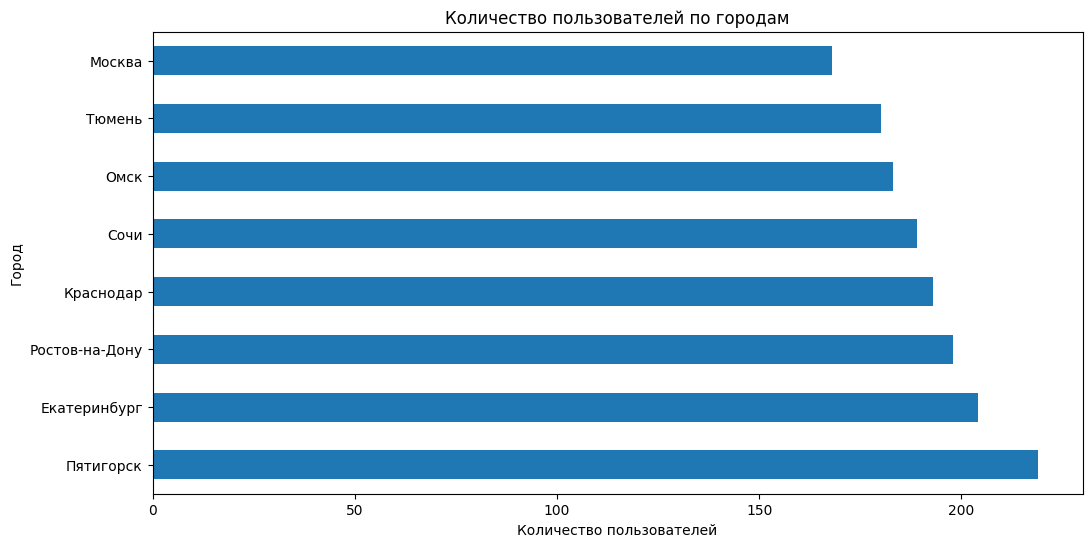

In [12]:
users['city'].value_counts().plot(kind='barh', figsize=(12, 6), title="Количество пользователей по городам", ylabel="Город", xlabel="Количество пользователей")
plt.show()

### Вывод:
В выборке взяты данные из 8 городов России. Из Пятигорска данных больше чем из других городов, а из Москвы - меньше. 

### 3.2 соотношение пользователей с подпиской и без подписки

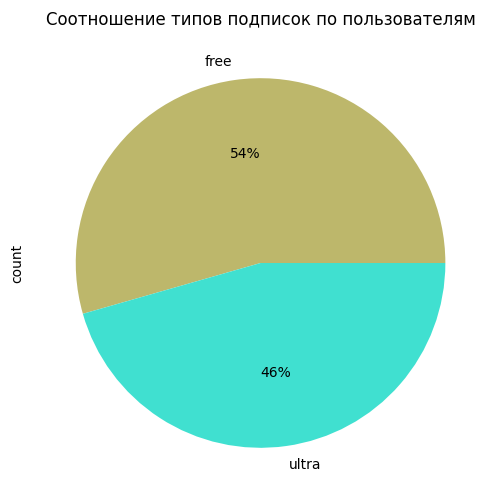

In [13]:
users['subscription_type'].value_counts().plot(kind='pie', y='value_counts', autopct='%1.0f%%',
 colors = ['darkkhaki', 'turquoise'], title='Соотношение типов подписок по пользователям', figsize=(6,6))
plt.show()

#### Вывод
Распределение пользователей по наличию подписки близко к соотношению 50/50. Однако пользователей с бесплатной подпиской немного больше (54%)

### 3.3 возраст пользователей

24.903520208604956


[]

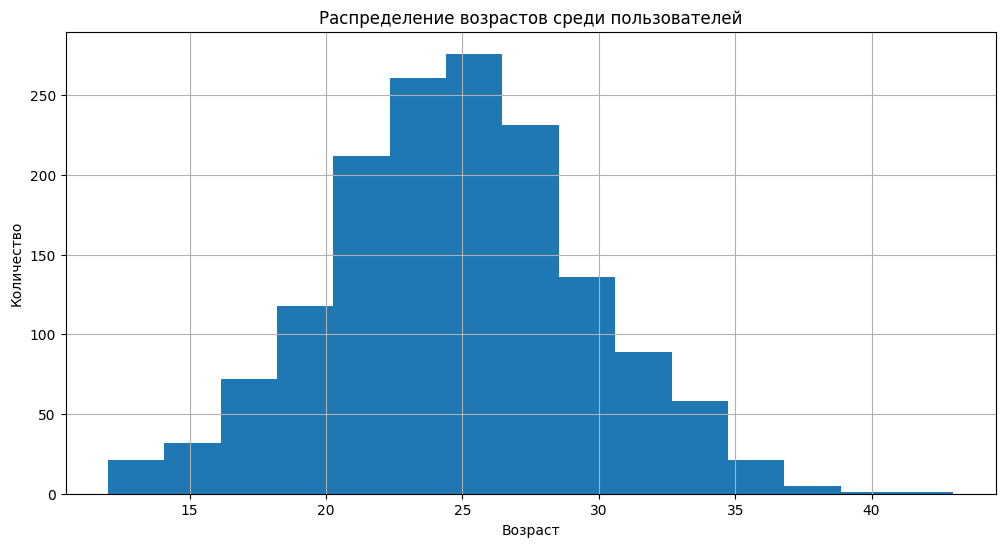

In [14]:
users['age'].hist(bins=15, figsize=(12,6))
plt.xlabel("Возраст")
plt.ylabel("Количество")
plt.title("Распределение возрастов среди пользователей")
print(users['age'].mean())
plt.plot()

#### Результаты анализа данных **users**:
* Средний возраст пользователей равен **25 годам** и **нормально распределен** около этого значения.
* Почти половина всех пользователей **(46%)** используют подписку **ultra**
* В **Пятигорске** **больше пользователей** GoFast чем в других городах, а **меньше всего в Москве**

### 3.4 расстояние, которое пользователь преодолел за одну поездку

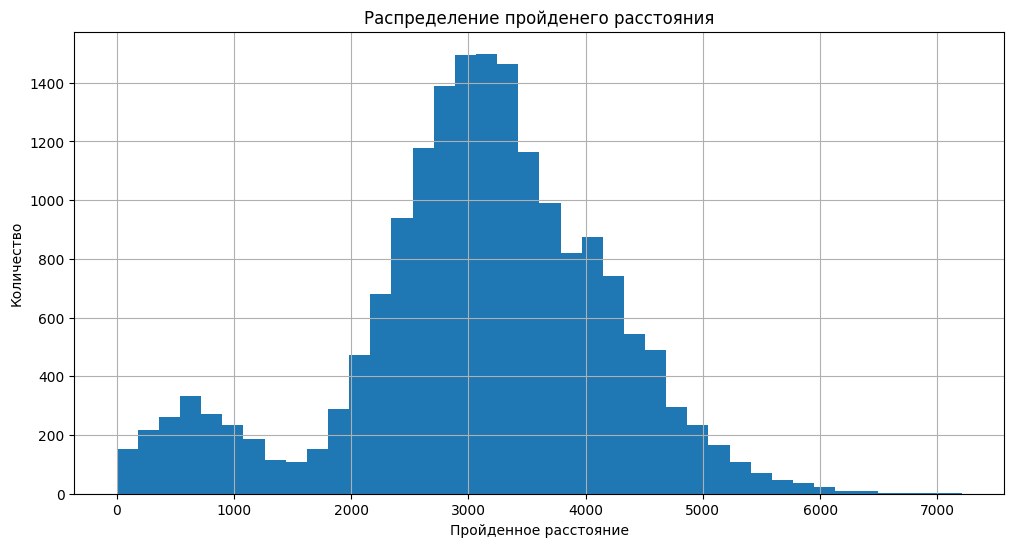

In [15]:
rides['distance'].hist(figsize=(12,6), bins=40)
plt.xlabel("Пройденное расстояние")
plt.ylabel("Количество")
plt.title("Распределение пройденего расстояния")
plt.show()

#### Результаты анализа данных о пройденном расстоянии:
* Наблюдается два пика в распределении - 750 м. и 3000 м.
* Большая часть поездок по расстоянию составляет от 2700 до 3500 м.

### 3.5 продолжительность поездок

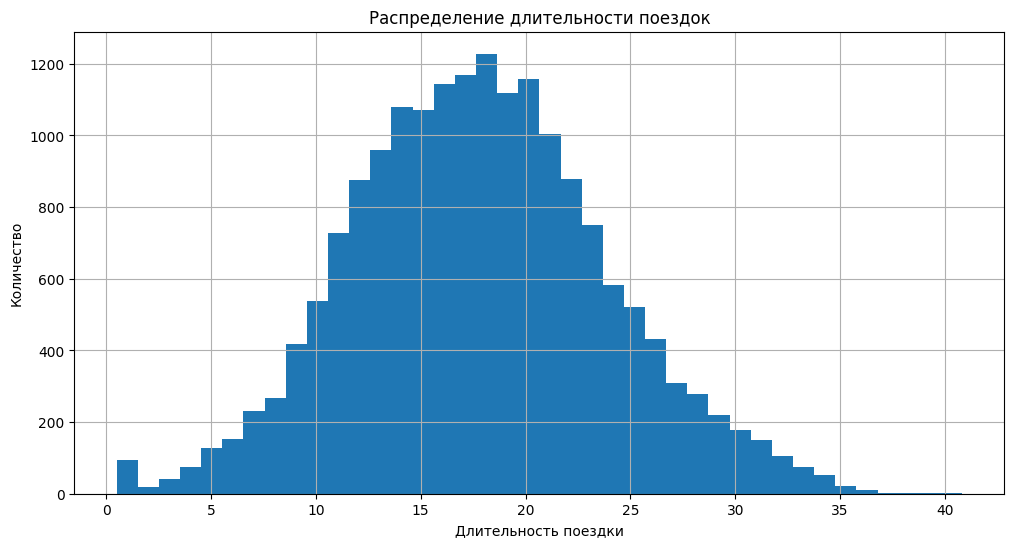

In [16]:
rides['duration'].hist(figsize=(12,6), bins=40)
plt.xlabel("Длительность поездки")
plt.ylabel("Количество")
plt.title("Распределение длительности поездок")
plt.show()

#### Результаты анализа данных **rides**:

Значение расстояния, которое пользователь проехал в текущей сессии **(distance)** имеет 2 пика:
1. Дистанция **750** метров
2. Дистанция **3000** метров
* Большая часть поездок по расстоянию составляет от 2700 до 3500 м.

Значение продолжительность сессии **(duration**) похоже на нормальное распределение с пиком в **18 минут**

Данные о дате поездок будут рассмотрены позже, они требуют предобработки

# Шаг 4. Объединение данных

### 4.1 Объединение данных о пользователях, поездках и подписках в один датафрейм.

In [17]:
data = users.merge(rides, on='user_id').merge(subscribtions, on='subscription_type')
get_data_info(data)

   user_id  name  age    city subscription_type     distance   duration  \
0        1  Кира   22  Тюмень             ultra  4409.919140  25.599769   
1        1  Кира   22  Тюмень             ultra  2617.592153  15.816871   
2        1  Кира   22  Тюмень             ultra   754.159807   6.232113   
3        1  Кира   22  Тюмень             ultra  2694.783254  18.511000   
4        1  Кира   22  Тюмень             ultra  4028.687306  26.265803   

        date  month  minute_price  start_ride_price  subscription_fee  
0 2021-01-01      1             6                 0               199  
1 2021-01-18      1             6                 0               199  
2 2021-04-20      4             6                 0               199  
3 2021-08-11      8             6                 0               199  
4 2021-08-28      8             6                 0               199  
____________________________________________________________________________________________________

<class 'pandas.

In [18]:
data[data['subscription_type']=='free']

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
6500,700,Айдар,22,Омск,free,2515.690719,14.944286,2021-01-02,1,8,50,0
6501,700,Айдар,22,Омск,free,846.932642,16.234663,2021-02-01,2,8,50,0
6502,700,Айдар,22,Омск,free,4004.434142,20.016628,2021-02-04,2,8,50,0
6503,700,Айдар,22,Омск,free,1205.911290,9.782872,2021-02-10,2,8,50,0
6504,700,Айдар,22,Омск,free,3047.379435,17.427673,2021-02-14,2,8,50,0
...,...,...,...,...,...,...,...,...,...,...,...,...
18063,1534,Альберт,25,Краснодар,free,3781.098080,19.822962,2021-11-04,11,8,50,0
18064,1534,Альберт,25,Краснодар,free,2840.423057,21.409799,2021-11-16,11,8,50,0
18065,1534,Альберт,25,Краснодар,free,3826.185507,18.435051,2021-11-18,11,8,50,0
18066,1534,Альберт,25,Краснодар,free,2902.308661,16.674362,2021-11-27,11,8,50,0


In [19]:
# Проверка на пропуски
print(f"Количество пропусков в data: {data.isna().sum().sum()}")

Количество пропусков в data: 0


### 4.2 Создание датфреймов для пользователей с разными подписками:

In [20]:
# Создаем два датасета для разных подписок
data_free = data[data['subscription_type'] == 'free']
data_ultra = data[data['subscription_type'] == 'ultra']

### 4.3 Визуализация информации о расстоянии и времени поездок для пользователей обеих категорий:

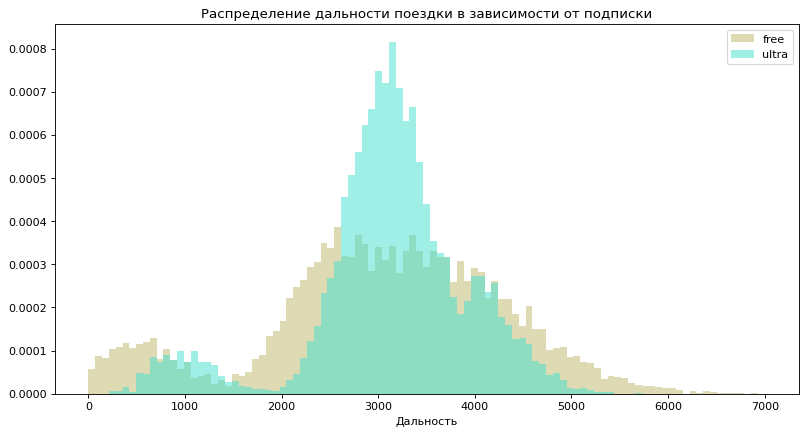

In [21]:
plt.figure(figsize=(12, 6), dpi=80)
bins = np.linspace(0, 7000, 100)
plt.hist(data_free['distance'], bins=bins, alpha=0.5, label='free', color='darkkhaki', density=True)
plt.hist(data_ultra['distance'], bins=bins, alpha=0.5, label='ultra', color='turquoise', density=True)
#denisty = True, т.к необходимо нормализовать для корректного сравнения.
plt.title("Распределение дальности поездки в зависимости от подписки")
plt.legend()
plt.xlabel("Дальность")
plt.show()

#### Вывод
Пользователи с подпиской **ultra**, которые проезжают около 3000 м. намного больше по сравнению c пользователями, которые используют подписку **free**. Пользователи с подпиской **free** иногда проезжают очень малое и очень большое расстояние, что не характерно для пользователей **ultra**

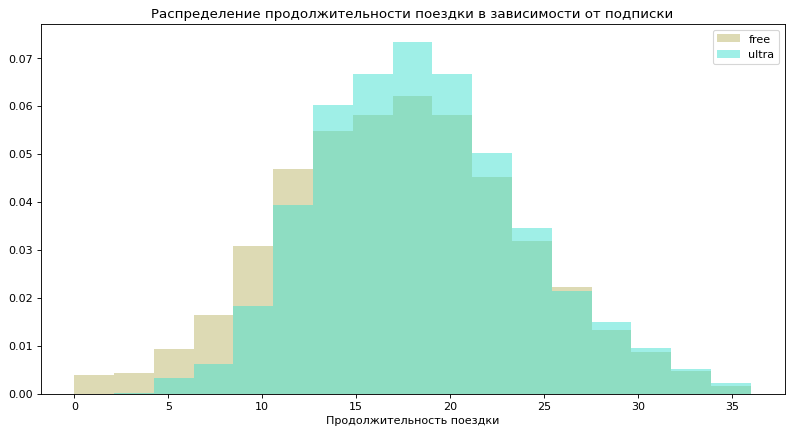

In [22]:
plt.figure(figsize=(12, 6), dpi=80)
bins = np.linspace(0, 36, 18)
plt.hist(data_free['duration'], bins=bins, alpha=0.5, label='free', color='darkkhaki', density=True)
plt.hist(data_ultra['duration'], bins=bins, alpha=0.5, label='ultra', color='turquoise', density=True)
#denisty = True, т.к необходимо нормализовать для корректного сравнения.
plt.title("Распределение продолжительности поездки в зависимости от подписки")
plt.legend()
plt.xlabel("Продолжительность поездки")
plt.show()

#### Вывод
Распределния очень похожи друг на друга, однако, в окрайности средней продолжительности поездки число пользователй **ultra** больше чем **free**. Пользователи с подпиской **free** тратят на поездки меньше времени.

# Шаг 5. Подсчёт выручки

### 5.1

In [23]:
users_revenue = pd.pivot_table(data, index=['user_id', 'month'], aggfunc={'distance':'sum', 'duration':'sum', 'date':'count'})
users_revenue.columns = ['count', 'distance', 'duration']
users_revenue['duration'] = np.ceil(users_revenue['duration'])

In [24]:
def get_sub_type(df):
    id_users = df.index.get_level_values(0).unique()
    for i in id_users:
        month = users_revenue.loc[i, :].index.tolist()
        for j in month:
#             cur_row = df.loc[(i,j)]['subscription_type']
#             print(users[users['user_id'] == i]['subscription_type'].tolist()[0])
            df.loc[(i, j), 'subscription_type'] = users[users['user_id'] == i]['subscription_type'].tolist()[0]
get_sub_type(users_revenue)
users_revenue['subscription_type'].value_counts()
users_revenue

count      distance  duration subscription_type
user_id month                                                 
1       1          2   7027.511294      42.0             ultra
        4          1    754.159807       7.0             ultra
        8          2   6723.470560      45.0             ultra
        10         2   5809.911100      32.0             ultra
        11         3   7003.499363      54.0             ultra
...              ...           ...       ...               ...
1534    6          2   3409.468534      25.0              free
        8          2   7622.453034      48.0              free
        9          1   4928.173852      23.0              free
        11         4  13350.015305      77.0              free
        12         1   2371.711192      16.0              free

[11331 rows x 4 columns]

### 5.2

In [25]:
id_free_users = data_free['user_id'].drop_duplicates().tolist()
id_ultra_users = data_ultra['user_id'].drop_duplicates().tolist()
users_revenue['duration'] = np.ceil(users_revenue['duration'])
def get_revenue(df):
    id_users = df.index.get_level_values(0).unique()
    for i in id_users:
        month = users_revenue.loc[i, :].index.tolist()
        if i in id_free_users:
            for j in month:
                cur_row = df.loc[(i,j)]
                df.at[(i, j), 'revenue'] = cur_row.loc['count'] * 50 + cur_row.loc['duration'] * 8
        elif i in id_ultra_users:
            for j in month:
                cur_row = df.loc[(i,j)]
                df.at[(i, j), 'revenue'] = 199 + cur_row.loc['duration'] * 6

get_revenue(users_revenue)
users_revenue

count      distance  duration subscription_type  revenue
user_id month                                                          
1       1          2   7027.511294      42.0             ultra    451.0
        4          1    754.159807       7.0             ultra    241.0
        8          2   6723.470560      45.0             ultra    469.0
        10         2   5809.911100      32.0             ultra    391.0
        11         3   7003.499363      54.0             ultra    523.0
...              ...           ...       ...               ...      ...
1534    6          2   3409.468534      25.0              free    300.0
        8          2   7622.453034      48.0              free    484.0
        9          1   4928.173852      23.0              free    234.0
        11         4  13350.015305      77.0              free    816.0
        12         1   2371.711192      16.0              free    178.0

[11331 rows x 5 columns]

# Шаг 6. Проверка гипотез

### 6.1

Формулировка гипотезы:
* Нулевая гипотеза: Продолжительность поездки пользователей с подпиской ultra равна родолжительности поездки пользователей с подпиской free
* Альтернативная гипотеза: Продолжительность поездки с подпиской free меньше, чем с подпиской ultra

Используем левый односторонний ttest для двух независимых выборок.

In [26]:
alpha = 0.05
results = st.ttest_ind(data_free['duration'], data_ultra['duration'], alternative='less')
print('p-значение:', results.pvalue)

p-значение: 1.2804098316645618e-34


В связи с тем, что p-value крайне мало по сравнению с стат.значимостью мы принимает альтернативную гипотезу, что длительность поездок пользователей с подпиской выше чем длительность поездок пользователей с бесплатной подпиской

### 6.2

Формулировка гипотезы:
* Нулевая гипотеза: Среднее расстояние которое проезжают пользователи (ultra) равно опитмальному (3130 м)
* Альтернативная гипотеза: Расстояние которое проезжают пользователи (ultra) больше оптимального.

Используем правый односторонний ttest для одной выборки.

In [27]:
normal_distance = 3130
# alpha = 0.05
results = st.ttest_1samp(
    data_ultra['distance'], 
    normal_distance,
    alternative='greater')

print('p-значение:', results.pvalue)

p-значение: 0.9195368847849785


Значение p-value составило 0.91, что сильно выше статистической значимости, мы не можем отвергнуть нулевую гипотезу, из чего можно сделать вывод, что в среднем пользователи будут проезжать приближенно к этому значению или меньшее расстояние

# Вывод

### В ходе анализа данных была проделана следущая работа:

#### Предобработка:
    1. Выявлены и удалены дубликаты пользователей
    2. Данные имели не корректный формат даты, было произведено привидение типов.
#### Исследовательсикй анализ:
    В ходе исследования было выявлено, что:
    
    Пользователей с подпиской почти половина (46%) от общего числа.
    Средняя протяженность поездки составляет 3 км.
    Поездка занимает 15-20 минут
    Возраст большей части пользователей составляет 20-27 лет
    
* Были созданы новые таблицы, в которых хранятся данные о пользователях с бесплатной и ультра подпиской.
* Была подсчитана выручка от каждого пользователя, за каждый месяц.

#### Проверка гипотез
1. В ходе проверки гипотезы о том, что было пользователи с подпиской тратят больше времени на поездки, основываясь на результах теста можно говорить и том, что эту гипотезу можно принять.

2. В ходе проверки гипотезы о том, средняя протяженность поездки не превышает 3130 меторов, основываясь на результах теста можно говорить и том, что эту гипотезу можно принять.

3. В ходе проверки гипотезы о том, средняя выручка от пользователей с подпиской выше, чем от пользователей без подписки, основываясь на результах теста можно говорить и том, что эту гипотезу можно принять.

#### Рекомендации:
В ходе исследования было выявлено, что пользователи с подпиской ultra более выгодны для компании. Поэтому необходимо увеличивать их число.